## K-NN classification

In [27]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table("fruit_data_with_colors.txt")

In [18]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [19]:
fruits.shape

(59, 7)

In [28]:
# x=[1,2,3], y=[a,b,c]
# zip(x,y) -> x = [1,a],[2,a],[3,a]
# unique() 는 중복없이
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))

In [29]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [34]:
from matplotlib import cm

# X= 학습시킬 feature
X = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']

#랜덤하게 요소들을 train시킨다(75%)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [35]:
# 랜덤하게 X트레인(75%) 결과
X_train.head()

,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80


<IPython.core.display.Javascript object>


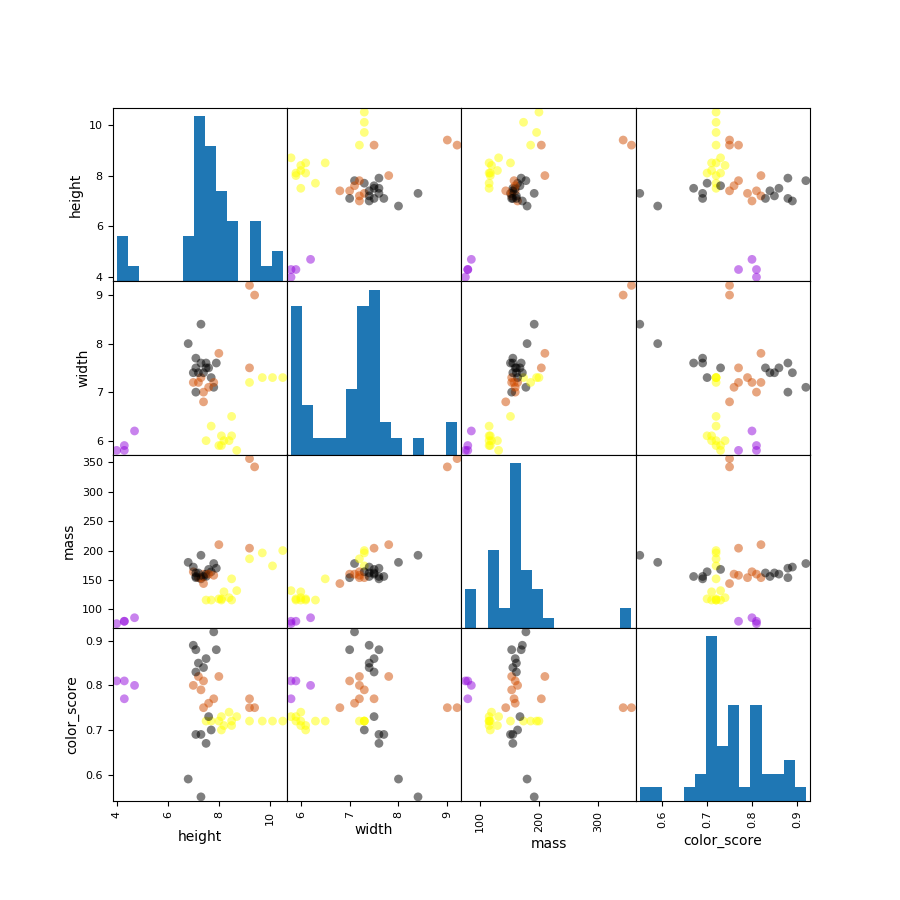

In [36]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c = y_train,marker = 'o', s= 40, hist_kwds={'bins':15},figsize=(9,9),cmap = cmap)


In [64]:
X = fruits[['mass','width','height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [65]:
# K-NN 학습 

# n_neighbor = 5 -> k = 5임을 의미(ppt)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [66]:
# 테스트 정확도 확인
knn.score(X_test,y_test)

0.5333333333333333

In [67]:
# 트레인 정확도
knn.score(X_train,y_train)

0.7954545454545454

In [68]:
# 다른 데이터를 입력하여 결과 예측
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [46]:
# parameter change
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

In [47]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

<IPython.core.display.Javascript object>


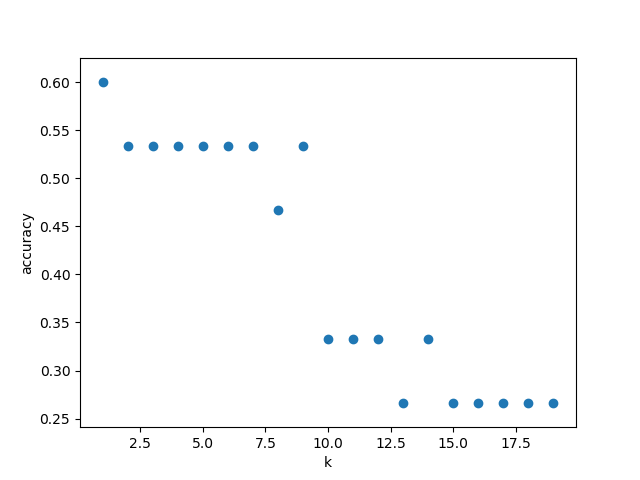

In [49]:
# K가 클수록 안좋아지는 것을 확인 (overfit)

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)

In [52]:
# Sensitiveness of K-NN classification according to train/test split proportion
# 얼만큼 split을 해야 정확도가 올라가는지 확인해본다

t = [0.8,0.7,0.6,0.5,0.4,0.3,0.2]
knn = KNeighborsClassifier(n_neighbors=5)

scores = []
for s in t:
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1-s)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

In [53]:
scores

[0.8333333333333334,
 0.4444444444444444,
 0.4583333333333333,
 0.5,
 0.5555555555555556,
 0.42857142857142855,
 0.4166666666666667]

<IPython.core.display.Javascript object>


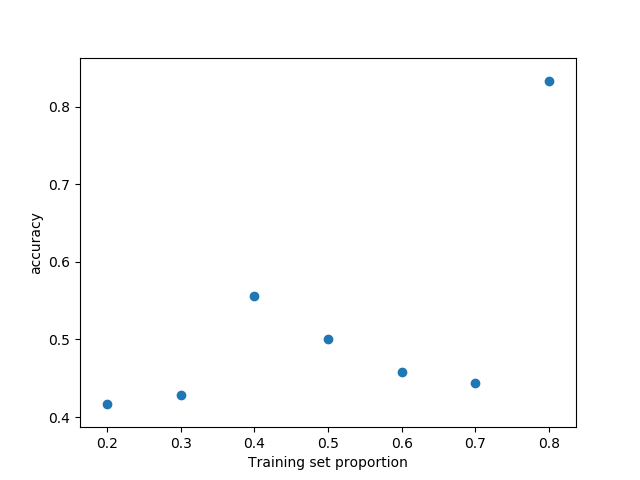

In [57]:
plt.figure()
plt.xlabel('Training set proportion')
plt.ylabel('accuracy')
plt.scatter(t,scores)